# Exploratory Data Analysis - NBA Players Data

#### João Vitor de Paiva Marcotti
#### Electrical Engineer - State University of Maringá - UEM (Brazil)
#### 8th Semester Economics Student - Cesumar University - UniCesumar (Brazil)
#### Open to Work
#### Contact: joaovmarcotti@hotmail.com

# ---------------------------------------------------------------------------------------------------------------

In [ ]:
# Import the Pandas, Matplotlib, Numpy and Seaborn libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import seaborn as sns

In [ ]:
# Import the dataframe from a previous cleaned .csv file
df = pd.read_csv('players_data_cleaned.csv')
df

,Name,Year Start,Year End,Position,Height,Weight,Birth Day,Birth Month,Birth Year,College
0,Alaa Abdelnaby,1991,1995,C,2.08,108.86,24,6,1968,Duke University
1,Zaid Abdul-Aziz,1969,1978,F,2.06,106.59,7,4,1946,Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,2.18,102.06,16,4,1947,"University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,1.85,73.48,9,3,1969,Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,1.98,101.15,3,11,1974,San Jose State University
...,...,...,...,...,...,...,...,...,...,...
4508,Ante Zizic,2018,2018,C,2.11,113.40,4,1,1997,International
4509,Jim Zoet,1983,1983,C,2.16,108.86,20,12,1953,Kent State University
4510,Bill Zopf,1971,1971,G,1.85,77.11,7,6,1948,Duquesne University
4511,Ivica Zubac,2017,2018,C,2.16,120.20,18,3,1997,International


In [ ]:
# Declares two arrays that will be used in the code
positions = ['G', 'F', 'C']
years = sorted(df['Year Start'].unique())

# ---------------------------------------------------------------------------------------------------------------

# Players BMI - Body Mass Index

In [ ]:
# Calculates the players BMI

BMI = []
BMI_status = []

for i in df.index:
    bmi = round((df['Weight'][i])/(df['Height'][i]**2),2)
    BMI.append(bmi)
    if(bmi<18.5):
        BMI_status.append('Undeweight')
    elif(18.5<=bmi<25):
        BMI_status.append('Normal')
    elif(25<=bmi<30):
        BMI_status.append('Overweight')
    elif(30<=bmi<35):
        BMI_status.append('Obese')
    elif(35<=bmi):
        BMI_status.append('Extremely Obese')

df.insert(6, 'BMI Status', BMI_status)
df.insert(6, 'BMI', BMI)
df

,Name,Year Start,Year End,Position,Height,Weight,BMI,BMI Status,Birth Day,Birth Month,Birth Year,College
0,Alaa Abdelnaby,1991,1995,C,2.08,108.86,25.16,Overweight,24,6,1968,Duke University
1,Zaid Abdul-Aziz,1969,1978,F,2.06,106.59,25.12,Overweight,7,4,1946,Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,2.18,102.06,21.48,Normal,16,4,1947,"University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,1.85,73.48,21.47,Normal,9,3,1969,Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,1.98,101.15,25.80,Overweight,3,11,1974,San Jose State University
...,...,...,...,...,...,...,...,...,...,...,...,...
4508,Ante Zizic,2018,2018,C,2.11,113.40,25.47,Overweight,4,1,1997,International
4509,Jim Zoet,1983,1983,C,2.16,108.86,23.33,Normal,20,12,1953,Kent State University
4510,Bill Zopf,1971,1971,G,1.85,77.11,22.53,Normal,7,6,1948,Duquesne University
4511,Ivica Zubac,2017,2018,C,2.16,120.20,25.76,Overweight,18,3,1997,International


In [ ]:
# Checks if there is any players underweighted
df[df['BMI Status']=='Underweight']

,Name,Year Start,Year End,Position,Height,Weight,BMI,BMI Status,Birth Day,Birth Month,Birth Year,College


In [ ]:
# Checks if there is any players extremely obese
df[df['BMI Status']=='Extremely Obese']

,Name,Year Start,Year End,Position,Height,Weight,BMI,BMI Status,Birth Day,Birth Month,Birth Year,College


In [ ]:
# Counts how many players have each BMI status

total_players = 0

normal_count = 0
OW_count = 0
UW_count = 0
EO_count = 0

normal_ratio = 0
UW_ratio = 0
OW_ratio = 0
EO_ratio = 0

ratios = [UW_ratio,normal_ratio,OW_ratio,EO_ratio]
counts = [UW_count,normal_count,OW_count,EO_count]
status = ['Underweight','Normal','Overweight','Extremely Obese']

for i in df.index:
    total_players+=1
    for j in range(4):
        if (df['BMI Status'][i]==status[j]):
            counts[j]+=1

for i in range(4):
    ratios[i] = round(100*counts[i]/total_players,2)

df_BMI = {'Status': status,
          'Number of Players': counts,
          'Ratio (%)': ratios}

df_BMI = pd.DataFrame(df_BMI)
df_BMI

,Status,Number of Players,Ratio (%)
0,Underweight,0,0.00
1,Normal,3361,74.47
2,Overweight,1135,25.15
3,Extremely Obese,0,0.00


In [ ]:
# Calculates the BMI in each year since the NBA foundation

year_BMI = []
BMI_mean = []

for year in years:
    year_BMIs = []
    players_year_weight = []
    for i in df.index:
        if(df['Year Start'][i]<=year<=df['Year End'][i]):
            year_BMI.append(df['BMI'][i])
    BMI_mean.append(round(np.mean(year_BMI),2))

df_BMI = pd.DataFrame({'Year':years, 'Average BMI':BMI_mean})
df_BMI

,Year,Average BMI
0,1947,23.93
1,1948,23.80
2,1949,23.78
3,1950,23.74
4,1951,23.74
...,...,...
67,2014,24.02
68,2015,24.03
69,2016,24.05
70,2017,24.06


(0.0, 30.0)

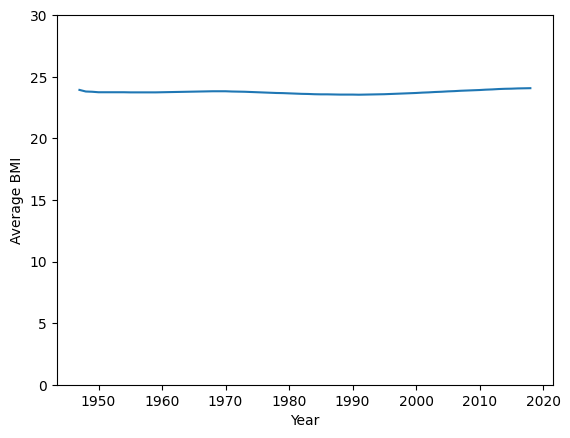

In [ ]:
# Graphic of the number of players that entered the league by year
plt.plot(df_BMI['Year'],df_BMI['Average BMI'])
plt.ylabel('Average BMI')
plt.xlabel('Year')
plt.ylim(0,30)

In [ ]:
# Defines the correlation between year and average BMI (0.25 = weak)
round(df_BMI.corr(),2)

,Year,Average BMI
Year,1.00,0.25
Average BMI,0.25,1.00


In [ ]:
# Counts how many players have each BMI status in each position

df_BMI = pd.DataFrame()

df_BMI['Status'] = status

for k in positions:

    ratios = [UW_ratio,normal_ratio,OW_ratio,EO_ratio]
    counts = [UW_count,normal_count,OW_count,EO_count]
    status = ['Underweight','Normal','Overweight','Extremely Obese']

    total_players = 0

    normal_count = 0
    OW_count = 0
    UW_count = 0
    EO_count = 0

    normal_ratio = 0
    UW_ratio = 0
    OW_ratio = 0
    EO_ratio = 0

    for i in df[df['Position']==k].index:
        total_players+=1
        for j in range(4):
            if (df[df['Position']==k]['BMI Status'][i]==status[j]):
                counts[j]+=1

    for i in range(4):
        ratios[i] = round(100*counts[i]/total_players,2)

    df_BMI['Number of '+k] = counts
    df_BMI['Ratio '+k+' (%)'] = ratios

df_BMI

,Status,Number of G,Ratio G (%),Number of F,Ratio F (%),Number of C,Ratio C (%)
0,Underweight,0,0.00,0,0.00,0,0.00
1,Normal,1599,83.15,1197,70.21,565,63.84
2,Overweight,324,16.85,502,29.44,309,34.92
3,Extremely Obese,0,0.00,0,0.00,0,0.00


# ---------------------------------------------------------------------------------------------------------------

# Number of Players that Entered the League

In [ ]:
# Number of players that entered the league by year

count = []

for i in years:
    count.append(df['Year Start'].value_counts()[i])

year_start_count = pd.DataFrame({'Year':years,'Players that Entered the League':count})
year_start_count

,Year,Players that Entered the League
0,1947,157
1,1948,40
2,1949,94
3,1950,118
4,1951,30
...,...,...
67,2014,78
68,2015,82
69,2016,73
70,2017,88


Text(0.5, 0, 'Year')

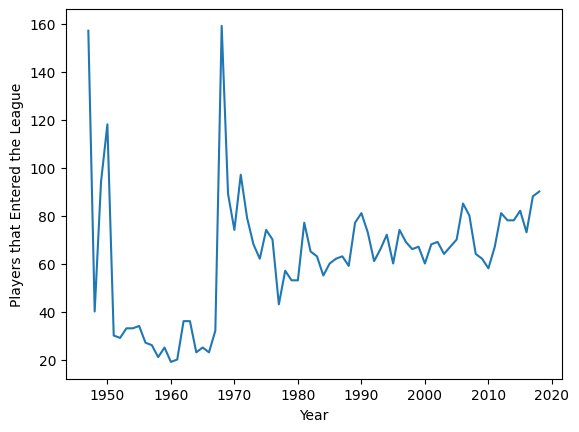

In [ ]:
# Graphic of the number of players that entered the league by year
plt.plot(year_start_count['Year'],year_start_count['Players that Entered the League'])
plt.ylabel('Players that Entered the League')
plt.xlabel('Year')

In [ ]:
# Displays the year in which the most players entered the NBA. Between 1966 and 1968, the league expanded from 9 to 14 teams.
year_start_count[year_start_count['Players that Entered the League'] == year_start_count['Players that Entered the League'].max()]

,Year,Players that Entered the League
21,1968,159


# ---------------------------------------------------------------------------------------------------------------

# Number of Players that Exited the League

In [ ]:
# Number of players that exited the league by year

count = []

for i in years:
    count.append(df['Year End'].value_counts()[i])

year_end_count = pd.DataFrame({'Year':years,'Players that Exited the League':count})
year_end_count = year_end_count.drop(year_end_count[year_end_count['Year']==2018].index[0])
year_end_count

,Year,Players that Exited the League
0,1947,84
1,1948,30
2,1949,72
3,1950,100
4,1951,52
...,...,...
66,2013,73
67,2014,79
68,2015,83
69,2016,84


Text(0.5, 0, 'Year')

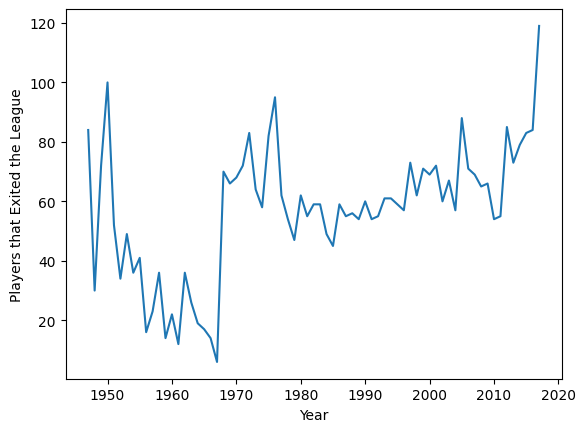

In [ ]:
# Graphic of the number of players that exited the league by year
plt.plot(year_end_count['Year'],year_end_count['Players that Exited the League'])
plt.ylabel('Players that Exited the League')
plt.xlabel('Year')

In [ ]:
# Displays the year in which the most players exited the NBA
year_end_count[year_end_count['Players that Exited the League'] == year_end_count['Players that Exited the League'].max()]

,Year,Players that Exited the League
70,2017,119


# ---------------------------------------------------------------------------------------------------------------

# Number of Birthdays by Year

In [ ]:
# Splits the years that at least a player was born
birth_years = sorted(df['Birth Year'].unique())

In [ ]:
# Number of players that was born by year

count = []

for i in birth_years:
    count.append(df['Birth Year'].value_counts()[i])

birth_year_count = pd.DataFrame({'Year':birth_years,'Players borned in this year':count})
birth_year_count

,Year,Players borned in this year
0,1902,1
1,1913,4
2,1914,1
3,1915,6
4,1916,8
...,...,...
82,1994,57
83,1995,43
84,1996,31
85,1997,27


# ---------------------------------------------------------------------------------------------------------------

# Number of Birthdays by Month

In [ ]:
# Splits the months that at least a player was born
birth_months = sorted(df['Birth Month'].unique())

In [ ]:
# Number of players that was born by month

count = []

for i in birth_months:
    count.append(df['Birth Month'].value_counts()[i])

birth_month_count = pd.DataFrame({'Month':birth_months,'Players borned in this month':count})
birth_month_count

,Month,Players borned in this month
0,1,381
1,2,379
2,3,403
3,4,336
4,5,367
5,6,367
6,7,420
7,8,367
8,9,394
9,10,388


# ---------------------------------------------------------------------------------------------------------------

# Number of Birthdays by Day

In [ ]:
# Splits the days that at least a player was born
birth_days = sorted(df['Birth Day'].unique())

In [ ]:
# Number of players that was born by day

count = []

for i in birth_days:
    count.append(df['Birth Day'].value_counts()[i])

birth_day_count = pd.DataFrame({'Day':birth_days,'Players borned in this Day':count})
birth_day_count

,Day,Players borned in this Day
0,1,155
1,2,161
2,3,156
3,4,134
4,5,157
5,6,136
6,7,161
7,8,142
8,9,151
9,10,144


# ---------------------------------------------------------------------------------------------------------------

# Average Weight

In [ ]:
# Calcules the average weight year by year

average_weight = []

for year in years:
    year_weights = []
    for i in df.index:
        if(df['Year Start'][i]<=year<=df['Year End'][i]):
            year_weights.append(df['Weight'][i])
    average_weight.append(round(np.mean(year_weights),2))

df_AvWe = pd.DataFrame({'Year':years, 'Average Weight':average_weight})
df_AvWe

,Year,Average Weight
0,1947,85.46
1,1948,84.99
2,1949,86.88
3,1950,86.86
4,1951,88.25
...,...,...
67,2014,100.61
68,2015,100.32
69,2016,100.31
70,2017,99.71


Text(0.5, 0, 'Year')

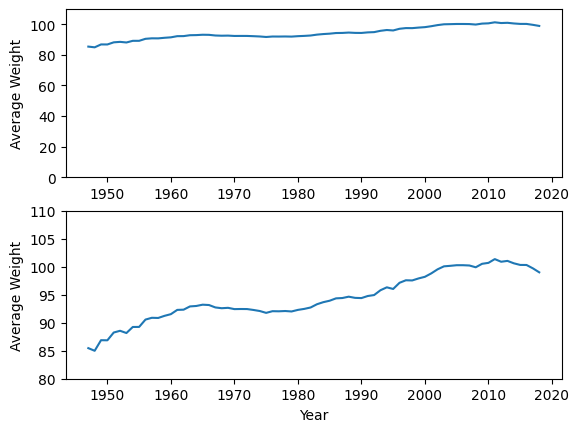

In [ ]:
# Displays the average weight year by year in a graphic

fig, (AvWe_Fig, AvWe_Zoom) = plt.subplots(2, 1)  # Cria 2 eixos na mesma moldura

AvWe_Fig.plot(df_AvWe['Year'],df_AvWe['Average Weight'])
AvWe_Fig.set_ylim(0,110)
AvWe_Fig.set_ylabel('Average Weight')

AvWe_Zoom.plot(df_AvWe['Year'],df_AvWe['Average Weight'])
AvWe_Zoom.set_ylim(80,110)
AvWe_Zoom.set_ylabel('Average Weight')
AvWe_Zoom.set_xlabel('Year')

In [ ]:
# 2011 was the year with the maximum average weight of 101.36 Kg
df_AvWe[df_AvWe['Average Weight']==df_AvWe['Average Weight'].max()]

,Year,Average Weight
64,2011,101.36


In [ ]:
# 1948 was the year with the minimum average weight of 84,99 Kg
df_AvWe[df_AvWe['Average Weight']==df_AvWe['Average Weight'].min()]

,Year,Average Weight
1,1948,84.99


In [ ]:
# Correlation between the years and the players average weight. 0.95 = very strong
round(df_AvWe.corr(),2)

,Year,Average Weight
Year,1.00,0.95
Average Weight,0.95,1.00


# ---------------------------------------------------------------------------------------------------------------

# Average Weight By Position

In [ ]:
# Calcules the average weight by position by year

df_AvWe_Position = pd.DataFrame()

df_AvWe_Position['Year'] = years

for k in positions:
    average_weight = []
    for year in years:
        year_weights = []
        for i in df[df['Position']==k].index:
            if(df[df['Position']==k]['Year Start'][i]<=year<=df[df['Position']==k]['Year End'][i]):
                year_weights.append(df[df['Position']==k]['Weight'][i])
        average_weight.append(round(np.mean(year_weights),2))

    df_AvWe_Position[k+' Average Weight'] = average_weight

df_AvWe_Position

,Year,G Average Weight,F Average Weight,C Average Weight
0,1947,79.29,86.65,95.87
1,1948,78.85,87.18,93.91
2,1949,80.74,88.75,95.56
3,1950,80.20,88.48,95.57
4,1951,81.42,90.31,95.41
...,...,...,...,...
67,2014,90.03,105.32,115.14
68,2015,90.01,105.24,114.92
69,2016,90.03,105.57,114.12
70,2017,90.16,104.97,113.56


Text(0.5, 0, 'Year')

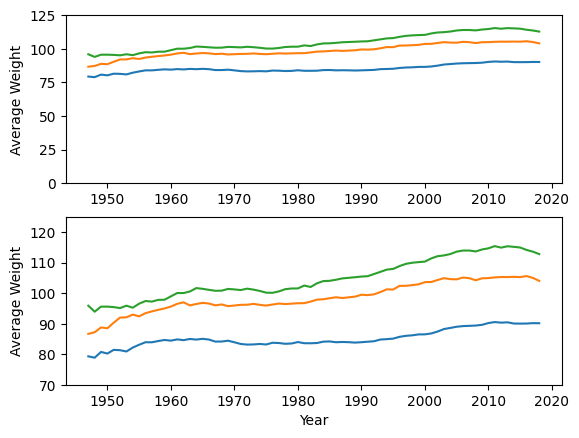

In [ ]:
# Dsplay the average weight by position by year in a graphic

fig, (AvWe_Fig, AvWe_Zoom) = plt.subplots(2, 1)

for k in positions:
    AvWe_Fig.plot(df_AvWe_Position['Year'],df_AvWe_Position[k+' Average Weight'])
    AvWe_Zoom.plot(df_AvWe_Position['Year'],df_AvWe_Position[k+' Average Weight'])

AvWe_Fig.set_ylim(0,125)
AvWe_Fig.set_ylabel('Average Weight')

AvWe_Zoom.set_ylim(70,125)
AvWe_Zoom.set_ylabel('Average Weight')
AvWe_Zoom.set_xlabel('Year')

In [ ]:
# Correlation between the years and the weight by position
round(df_AvWe_Position.corr(),2)

,Year,G Average Weight,F Average Weight,C Average Weight
Year,1.00,0.87,0.96,0.98
G Average Weight,0.87,1.00,0.93,0.92
F Average Weight,0.96,0.93,1.00,0.97
C Average Weight,0.98,0.92,0.97,1.00


<Axes: >

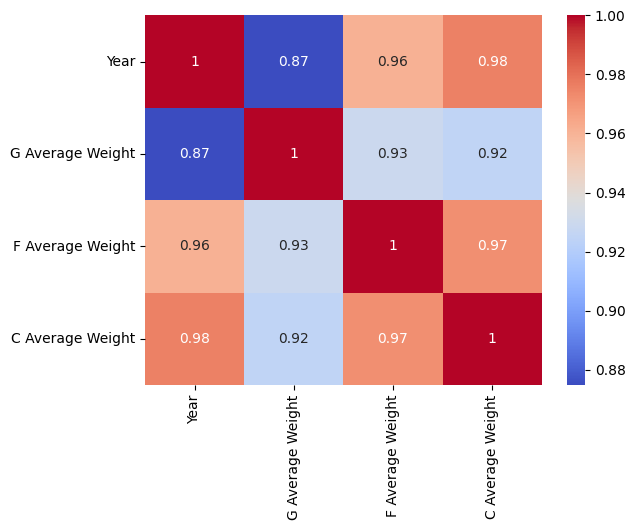

In [ ]:
# Heat map representing the correlation between the years and the weight by position
sns.heatmap(df_AvWe_Position.corr(), annot=True, cmap='coolwarm')

# ---------------------------------------------------------------------------------------------------------------

# Average Height

In [ ]:
# Calcules the average height year by year

average_height = []

for year in years:
    year_heights = []
    for i in df.index:
        if(df['Year Start'][i]<=year<=df['Year End'][i]):
            year_heights.append(df['Height'][i])
    average_height.append(round(np.mean(year_heights),2))

df_AvHe = pd.DataFrame({'Year':years, 'Average Height':average_height})
df_AvHe

,Year,Average Height
0,1947,1.89
1,1948,1.90
2,1949,1.91
3,1950,1.91
4,1951,1.93
...,...,...
67,2014,2.01
68,2015,2.01
69,2016,2.01
70,2017,2.01


Text(0.5, 0, 'Year')

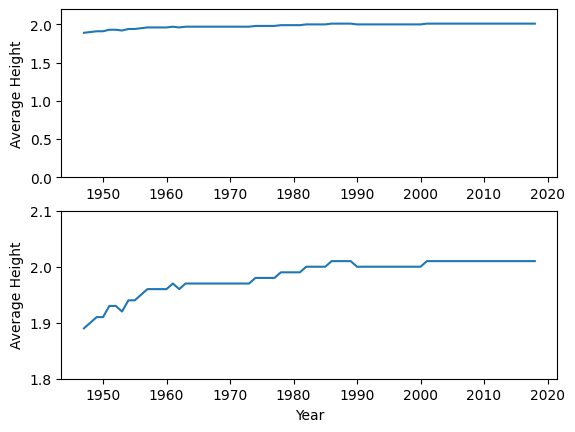

In [ ]:
# Displays a map of the average height year by year

fig, (AvHe_Fig, AvHe_Zoom) = plt.subplots(2, 1)  # Cria 2 eixos na mesma moldura

AvHe_Fig.plot(df_AvHe['Year'],df_AvHe['Average Height'])
AvHe_Fig.set_ylim(0,2.2)
AvHe_Fig.set_ylabel('Average Height')

AvHe_Zoom.plot(df_AvHe['Year'],df_AvHe['Average Height'])
AvHe_Zoom.set_ylim(1.8,2.1)
AvHe_Zoom.set_ylabel('Average Height')
AvHe_Zoom.set_xlabel('Year')

In [ ]:
# Multiple years with the maximum average height of 2.01 m
df_AvHe[df_AvHe['Average Height']==df_AvHe['Average Height'].max()]

,Year,Average Height
39,1986,2.01
40,1987,2.01
41,1988,2.01
42,1989,2.01
54,2001,2.01
55,2002,2.01
56,2003,2.01
57,2004,2.01
58,2005,2.01
59,2006,2.01


In [ ]:
# Multiple years with the minimum average height of 1.89 m
df_AvHe[df_AvHe['Average Height']==df_AvHe['Average Height'].min()]

,Year,Average Height
0,1947,1.89


In [ ]:
# Correlation between the years and the average height. 0.9 = very strong
round(df_AvHe.corr(),2)

,Year,Average Height
Year,1.0,0.9
Average Height,0.9,1.0


# ---------------------------------------------------------------------------------------------------------------

# Average Height By Position

In [ ]:
# Calcules the average weight by position by year

df_AvHe_Position = pd.DataFrame()

df_AvHe_Position['Year'] = years

for k in positions:

    average_height = []

    for year in years:
        year_heights = []
        for i in df[df['Position']==k].index:
            if(df[df['Position']==k]['Year Start'][i]<=year<=df[df['Position']==k]['Year End'][i]):
                year_heights.append(df[df['Position']==k]['Height'][i])
        average_height.append(round(np.mean(year_heights),2))

    df_AvHe_Position[k+' Average Height'] = average_height

df_AvHe_Position

,Year,G Average Height,F Average Height,C Average Height
0,1947,1.82,1.91,1.99
1,1948,1.82,1.93,1.98
2,1949,1.85,1.94,1.99
3,1950,1.85,1.94,1.99
4,1951,1.86,1.95,2.00
...,...,...,...,...
67,2014,1.93,2.05,2.11
68,2015,1.93,2.05,2.10
69,2016,1.93,2.05,2.10
70,2017,1.93,2.06,2.11


Text(0.5, 0, 'Year')

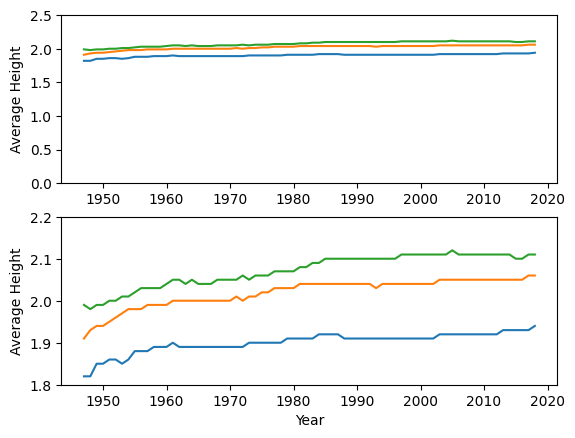

In [ ]:
# Dsplay the average weight by position by year in a graphic

fig, (AvHe_Fig, AvHe_Zoom) = plt.subplots(2, 1)  # Cria 2 eixos na mesma moldura

for k in positions:
    AvHe_Fig.plot(df_AvHe_Position['Year'],df_AvHe_Position[k+' Average Height'])
    AvHe_Zoom.plot(df_AvHe_Position['Year'],df_AvHe_Position[k+' Average Height'])

AvHe_Fig.set_ylim(0,2.5)
AvHe_Fig.set_ylabel('Average Height')

AvHe_Zoom.set_ylim(1.8,2.2)
AvHe_Zoom.set_ylabel('Average Height')
AvHe_Zoom.set_xlabel('Year')

In [ ]:
# Correlation between years and average height by position
round(df_AvHe_Position.corr(),2)

,Year,G Average Height,F Average Height,C Average Height
Year,1.00,0.87,0.91,0.94
G Average Height,0.87,1.00,0.97,0.92
F Average Height,0.91,0.97,1.00,0.97
C Average Height,0.94,0.92,0.97,1.00


<Axes: >

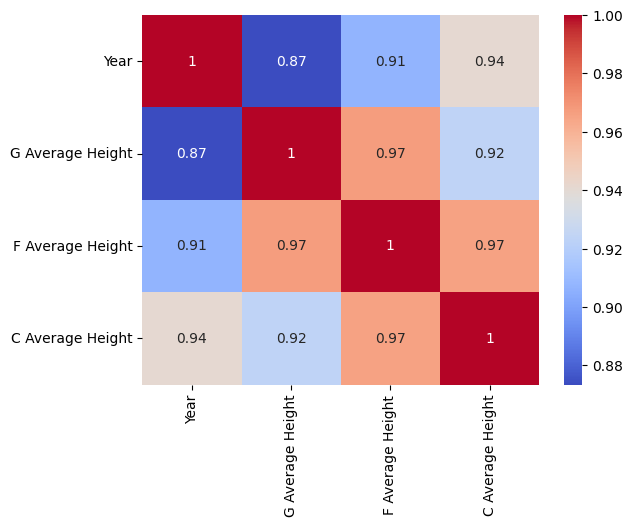

In [ ]:
# Heat map representing the correlation between years and average height by position
sns.heatmap(df_AvHe_Position.corr(), annot=True, cmap='coolwarm')

# ---------------------------------------------------------------------------------------------------------------

# Number of Players by Year

In [ ]:
# Calcules the number of players by year

number_of_players = []

df_NumPlayersTotal = pd.DataFrame()
df_NumPlayersTotal['Year'] = years

for year in years:
    players = 0
    for i in df.index:
        if(df['Year Start'][i]<=year<=df['Year End'][i]):
            players+=1
    number_of_players.append(players)

df_NumPlayersTotal['Number of Players'] = number_of_players

df_NumPlayersTotal

,Year,Number of Players
0,1947,157
1,1948,113
2,1949,177
3,1950,223
4,1951,153
...,...,...
67,2014,503
68,2015,506
69,2016,496
70,2017,500


# ---------------------------------------------------------------------------------------------------------------

# Number of Players by Position

In [ ]:
# Calcules the number of players by year by position

df_NumPlayersPosition = pd.DataFrame()
df_NumPlayersPosition['Year'] = years

for k in positions:
    players_array = []
    ratio_array = []
    for year in years:
        players = 0
        for i in df[df['Position']==k].index:
            if(df[df['Position']==k]['Year Start'][i]<=year<=df[df['Position']==k]['Year End'][i]):
                players+=1
            ratio = players/df_NumPlayersTotal[df_NumPlayersTotal['Year']==year]['Number of Players'][year-1947]
        players_array.append(players)
        ratio_array.append(ratio)
    df_NumPlayersPosition['Number of '+k] = players_array
    df_NumPlayersPosition['Ratio of '+k] = ratio_array

df_NumPlayersPosition

,Year,Number of G,Ratio of G,Number of F,Ratio of F,Number of C,Ratio of C
0,1947,63,0.401274,64,0.407643,30,0.191083
1,1948,50,0.442478,38,0.336283,25,0.221239
2,1949,72,0.406780,69,0.389831,36,0.203390
3,1950,95,0.426009,68,0.304933,60,0.269058
4,1951,59,0.385621,53,0.346405,41,0.267974
...,...,...,...,...,...,...,...
67,2014,220,0.437376,182,0.361829,101,0.200795
68,2015,227,0.448617,179,0.353755,100,0.197628
69,2016,223,0.449597,173,0.348790,100,0.201613
70,2017,231,0.462000,177,0.354000,92,0.184000


<Axes: >

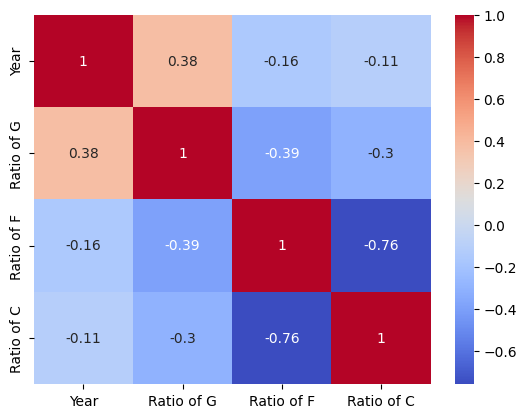

In [ ]:
sns.heatmap(df_NumPlayersPosition[['Year','Ratio of G','Ratio of F','Ratio of C']].corr(), annot=True, cmap='coolwarm')

<Axes: >

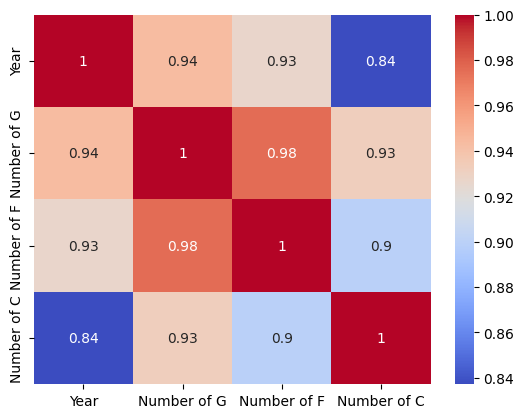

In [ ]:
sns.heatmap(df_NumPlayersPosition[['Year','Number of G','Number of F','Number of C']].corr(), annot=True, cmap='coolwarm')

# ---------------------------------------------------------------------------------------------------------------

# Heaviest Player By Year

In [ ]:
# Calcules the heaviest players year by year

heaviest_players_weight = []
heaviest_players_name = []
lightest_players_weight = []
lightest_players_name = []

for year in years:
    players_year_name = []
    players_year_weight = []
    for i in df.index:
        if(df['Year Start'][i]<=year<=df['Year End'][i]):
            players_year_name.append(df['Name'][i])
            players_year_weight.append(df['Weight'][i])
    heaviest_players_weight.append(max(players_year_weight))
    heaviest_players_name.append(players_year_name[players_year_weight.index(max(players_year_weight))])
    lightest_players_weight.append(min(players_year_weight))
    lightest_players_name.append(players_year_name[players_year_weight.index(min(players_year_weight))])

df_Heaviest = pd.DataFrame({'Year':years, 'Heaviest Players':heaviest_players_name, 'Weight':heaviest_players_weight})
df_Heaviest

,Year,Heaviest Players,Weight
0,1947,Harold Johnson,108.86
1,1948,Ed Sadowski,108.86
2,1949,George Mikan,111.13
3,1950,George Mikan,111.13
4,1951,George Mikan,111.13
...,...,...,...
67,2014,Dexter Pittman,139.71
68,2015,Sim Bhullar,163.29
69,2016,Nikola Pekovic,139.25
70,2017,Boban Marjanovic,131.54


# ---------------------------------------------------------------------------------------------------------------

# Heaviest Player Ever

In [ ]:
# Displays the heaviest player ever
df_Heaviest[df_Heaviest['Weight']==df_Heaviest['Weight'].max()].drop(['Year'],axis=1).drop_duplicates()

,Heaviest Players,Weight
68,Sim Bhullar,163.29


In [ ]:
# Displays some informations about the heaviest player ever

player_name = str(df_Heaviest[df_Heaviest['Weight'] == df_Heaviest['Weight'].max()].values[0][1])
player_weight = df[df['Name']==player_name].values[0][5]
player_start = df[df['Name']==player_name].values[0][1]
player_end = df[df['Name']==player_name].values[0][2]
player_height = df[df['Name']==player_name].values[0][4]

if(player_start == player_end):
    date_phrase = 'He played in the league just in '+str(player_start)
else:
    date_phrase = 'He played in the league from '+str(player_start)+' to '+str(player_end)

print('The heaviest player in the NBA history is '+str(player_name)+', with '+str(player_weight)+'Kg. '+date_phrase+', and was '+str(player_height)+'m height.')

The heaviest player in the NBA history is Sim Bhullar, with 163.29Kg. He played in the league just in 2015, and was 2.26m height.


# ---------------------------------------------------------------------------------------------------------------

# Lightest Player By Year

In [ ]:
# Displays the lightest players year by year

df_Lightest = pd.DataFrame({'Year':years, 'Lightest Players':lightest_players_name, 'Weight':lightest_players_weight})
df_Lightest

,Year,Lightest Players,Weight
0,1947,Chet Aubuchon,62.14
1,1948,Ernie Calverley,65.77
2,1949,Ernie Calverley,65.77
3,1950,Bobby Cook,70.31
4,1951,Leon Blevins,72.57
...,...,...,...
67,2014,Aaron Brooks,73.03
68,2015,Aaron Brooks,73.03
69,2016,Aaron Brooks,73.03
70,2017,Tyler Ulis,68.04


# ---------------------------------------------------------------------------------------------------------------

# Lightest Player Ever

In [ ]:
# Displays the lightest player ever
df_Lightest[df_Lightest['Weight']==df_Lightest['Weight'].min()].drop(['Year'],axis=1).drop_duplicates()

,Lightest Players,Weight
39,Spud Webb,60.33


In [ ]:
# Displays some informations about the lightest player ever

player_name = df_Lightest[df_Lightest['Weight'] == df_Lightest['Weight'].min()].values[0][1]
player_weight = df[df['Name']==player_name].values[0][5]
player_start = df[df['Name']==player_name].values[0][1]
player_end = df[df['Name']==player_name].values[0][2]
player_height = df[df['Name']==player_name].values[0][4]

if(player_start == player_end):
    date_phrase = 'He played in the league just in '+str(player_start)
else:
    date_phrase = 'He played in the league from '+str(player_start)+' to '+str(player_end)

print('The lightest player in the NBA history is '+str(player_name)+', with '+str(player_weight)+'Kg. '+date_phrase+', and was '+str(player_height)+'m height.')

The lightest player in the NBA history is Spud Webb, with 60.33Kg. He played in the league from 1986 to 1998, and was 1.68m height.


# ---------------------------------------------------------------------------------------------------------------

# Tallest Player By Year

In [ ]:
# Calcules the tallest players by year

tallest_players_height = []
tallest_players_name = []

for year in years:
    players_year_name = []
    players_year_height = []
    for i in df.index:
        if(df['Year Start'][i]<=year<=df['Year End'][i]):
            players_year_name.append(df['Name'][i])
            players_year_height.append(df['Height'][i])
    tallest_players_height.append(max(players_year_height))
    tallest_players_name.append(players_year_name[players_year_height.index(max(players_year_height))])

df_Tallest = pd.DataFrame({'Year':years, 'Tallest Player':tallest_players_name, 'Height':tallest_players_height})
df_Tallest

,Year,Tallest Player,Height
0,1947,Ralph Siewert,2.16
1,1948,Chick Halbert,2.06
2,1949,Jim Browne,2.08
3,1950,Harry Boykoff,2.08
4,1951,Harry Boykoff,2.08
...,...,...,...
67,2014,Hasheem Thabeet,2.21
68,2015,Sim Bhullar,2.26
69,2016,Boban Marjanovic,2.21
70,2017,Boban Marjanovic,2.21


# ---------------------------------------------------------------------------------------------------------------

# Tallest Player Ever

In [ ]:
# Displays the tallest player ever
df_Tallest[df_Tallest['Height']==df_Tallest['Height'].max()].drop(['Year'],axis=1).drop_duplicates()

,Tallest Player,Height
39,Manute Bol,2.31
49,Gheorghe Muresan,2.31


In [ ]:
# Displays some informations about the tallest player ever

player_name = df_Tallest[df_Tallest['Height'] == df_Tallest['Height'].max()].values[0][1]
player_weight = df[df['Name']==player_name].values[0][5]
player_start = df[df['Name']==player_name].values[0][1]
player_end = df[df['Name']==player_name].values[0][2]
player_height = df[df['Name']==player_name].values[0][4]

if(player_start == player_end):
    date_phrase = 'He played in the league just in '+str(player_start)
else:
    date_phrase = 'He played in the league from '+str(player_start)+' to '+str(player_end)

print('The tallest player in the NBA history is '+str(player_name)+', with '+str(player_height)+'m. '+date_phrase+', and weighed '+str(player_weight)+'Kg.')

The tallest player in the NBA history is Manute Bol, with 2.31m. He played in the league from 1986 to 1995, and weighed 90.72Kg.


# ---------------------------------------------------------------------------------------------------------------

# Smallest Player By Year

In [ ]:
# Calcules the smallest players by year

smallest_players_height = []
smallest_players_name = []

for year in years:
    players_year_name = []
    players_year_height = []
    for i in df.index:
        if(df['Year Start'][i]<=year<=df['Year End'][i]):
            players_year_name.append(df['Name'][i])
            players_year_height.append(df['Height'][i])
    smallest_players_height.append(min(players_year_height))
    smallest_players_name.append(players_year_name[players_year_height.index(min(players_year_height))])

df_Smallest = pd.DataFrame({'Year':years, 'Smallest Players':smallest_players_name, 'Height':smallest_players_height})
df_Smallest

,Year,Smallest Players,Height
0,1947,Mel Hirsch,1.68
1,1948,Herm Klotz,1.70
2,1949,Lionel Malamed,1.75
3,1950,Murray Wier,1.75
4,1951,Ralph Beard,1.78
...,...,...,...
67,2014,Nate Robinson,1.75
68,2015,Nate Robinson,1.75
69,2016,Nate Robinson,1.75
70,2017,Kay Felder,1.75


# ---------------------------------------------------------------------------------------------------------------

# Smallest Player Ever

In [ ]:
# Displays the smallest player ever
df_Smallest[df_Smallest['Height']==df_Smallest['Height'].min()].drop(['Year'],axis=1).drop_duplicates()

,Smallest Players,Height
41,Muggsy Bogues,1.6


In [ ]:
# Displays some informations about the smallest player ever

player_name = df_Smallest[df_Smallest['Height'] == df_Smallest['Height'].min()].values[0][1]
player_weight = df[df['Name']==player_name].values[0][5]
player_start = df[df['Name']==player_name].values[0][1]
player_end = df[df['Name']==player_name].values[0][2]
player_height = df[df['Name']==player_name].values[0][4]

if(player_start == player_end):
    date_phrase = 'He played in the league just in '+str(player_start)
else:
    date_phrase = 'He played in the league from '+str(player_start)+' to '+str(player_end)

print('The smallest player in the NBA history is '+str(player_name)+', with '+str(player_height)+'m. '+date_phrase+', and weighed '+str(player_weight)+'Kg.')

The smallest player in the NBA history is Muggsy Bogues, with 1.6m. He played in the league from 1988 to 2001, and weighed 61.69Kg.


# ---------------------------------------------------------------------------------------------------------------

# Smallest Player By Position By Year

In [ ]:
# Calculates te smallest player by position by year

df_Smallest_Position = pd.DataFrame()

df_Smallest_Position['Year'] = years

for k in ['G','F','C']:
    Smallest_Position_Name = []
    Smallest_Position_Height = []
    for year in years:
        players_year_name = []
        players_year_height = []
        for i in df[df['Position']==k].index:
            if(df[df['Position']==k]['Year Start'][i]<=year<=df[df['Position']==k]['Year End'][i]):
                players_year_name.append(df[df['Position']==k]['Name'][i])
                players_year_height.append(df[df['Position']==k]['Height'][i])
        Smallest_Position_Height.append(min(players_year_height))
        Smallest_Position_Name.append(players_year_name[players_year_height.index(min(players_year_height))])
    df_Smallest_Position['Smallest '+k+' Name'] = Smallest_Position_Name
    df_Smallest_Position['Smallest '+k+' Height'] = Smallest_Position_Height

df_Smallest_Position

,Year,Smallest G Name,Smallest G Height,Smallest F Name,Smallest F Height,Smallest C Name,Smallest C Height
0,1947,Mel Hirsch,1.68,Armand Cure,1.83,Pop Goodwin,1.88
1,1948,Herm Klotz,1.70,Ben Schadler,1.83,Pop Goodwin,1.88
2,1949,Lionel Malamed,1.75,Phil Farbman,1.85,Chuck Gilmur,1.93
3,1950,Murray Wier,1.75,Dee Gibson,1.80,Max Morris,1.88
4,1951,Ralph Beard,1.78,Ed Stanczak,1.85,Chuck Gilmur,1.93
...,...,...,...,...,...,...,...
67,2014,Nate Robinson,1.75,Jae Crowder,1.98,Chuck Hayes,1.98
68,2015,Nate Robinson,1.75,Jae Crowder,1.98,Chuck Hayes,1.98
69,2016,Nate Robinson,1.75,Jae Crowder,1.98,Chuck Hayes,1.98
70,2017,Kay Felder,1.75,DeAndre' Bembry,1.98,Boris Diaw,2.03


# ---------------------------------------------------------------------------------------------------------------

# Smallest Player By Position Ever

In [ ]:
# Displays the smallest guard ever
df_Smallest_Position[df_Smallest_Position['Smallest G Height']==df_Smallest_Position['Smallest G Height'].min()].drop_duplicates(['Smallest G Height']).drop(['Smallest F Name','Smallest F Height','Smallest C Name','Smallest C Height'],axis=1)

,Year,Smallest G Name,Smallest G Height
41,1988,Muggsy Bogues,1.6


In [ ]:
# Displays the smallest foward ever
df_Smallest_Position[df_Smallest_Position['Smallest F Height']==df_Smallest_Position['Smallest F Height'].min()].drop_duplicates(['Smallest F Height']).drop(['Smallest G Name','Smallest G Height','Smallest C Name','Smallest C Height'],axis=1)

,Year,Smallest F Name,Smallest F Height
3,1950,Dee Gibson,1.8


In [ ]:
# Displays the smallest center ever
df_Smallest_Position[df_Smallest_Position['Smallest C Height']==df_Smallest_Position['Smallest C Height'].min()].drop_duplicates(['Smallest C Height']).drop(['Smallest F Name','Smallest F Height','Smallest G Name','Smallest G Height'],axis=1)

,Year,Smallest C Name,Smallest C Height
0,1947,Pop Goodwin,1.88


# ---------------------------------------------------------------------------------------------------------------

# Tallest Player By Position By Year

In [ ]:
# Calculates te tallest player by position by year

df_Tallest_Position = pd.DataFrame()

df_Tallest_Position['Year'] = years

for k in ['G','F','C']:
    Tallest_Position_Name = []
    Tallest_Position_Height = []
    for year in years:
        players_year_name = []
        players_year_height = []
        for i in df[df['Position']==k].index:
            if(df[df['Position']==k]['Year Start'][i]<=year<=df[df['Position']==k]['Year End'][i]):
                players_year_name.append(df[df['Position']==k]['Name'][i])
                players_year_height.append(df[df['Position']==k]['Height'][i])
        Tallest_Position_Height.append(max(players_year_height))
        Tallest_Position_Name.append(players_year_name[players_year_height.index(max(players_year_height))])
    df_Tallest_Position['Tallest '+k+' Name'] = Tallest_Position_Name
    df_Tallest_Position['Tallest '+k+' Height'] = Tallest_Position_Height

df_Tallest_Position

,Year,Tallest G Name,Tallest G Height,Tallest F Name,Tallest F Height,Tallest C Name,Tallest C Height
0,1947,Butch Van Breda Kolff,1.91,Kleggie Hermsen,2.06,Ralph Siewert,2.16
1,1948,Carl Braun,1.96,Kleggie Hermsen,2.06,Chick Halbert,2.06
2,1949,Carl Braun,1.96,Kleggie Hermsen,2.06,Jim Browne,2.08
3,1950,Carl Braun,1.96,Kleggie Hermsen,2.06,Harry Boykoff,2.08
4,1951,Carl Braun,1.96,Larry Foust,2.06,Harry Boykoff,2.08
...,...,...,...,...,...,...,...
67,2014,Josh Childress,2.03,Spencer Hawes,2.16,Hasheem Thabeet,2.21
68,2015,JaKarr Sampson,2.06,Spencer Hawes,2.16,Sim Bhullar,2.26
69,2016,JaKarr Sampson,2.06,Spencer Hawes,2.16,Boban Marjanovic,2.21
70,2017,JaKarr Sampson,2.06,Dragan Bender,2.16,Boban Marjanovic,2.21


# ---------------------------------------------------------------------------------------------------------------

# Tallest Player By Position Ever

In [ ]:
# Displays the tallest guard ever
df_Tallest_Position[df_Tallest_Position['Tallest G Height']==df_Tallest_Position['Tallest G Height'].max()].drop_duplicates(['Tallest G Height']).drop(['Tallest F Name','Tallest F Height','Tallest C Name','Tallest C Height'],axis=1)

,Year,Tallest G Name,Tallest G Height
71,2018,Ben Simmons,2.08


In [ ]:
# Displays the tallest foward ever
df_Tallest_Position[df_Tallest_Position['Tallest F Height']==df_Tallest_Position['Tallest F Height'].max()].drop_duplicates(['Tallest F Height']).drop(['Tallest G Name','Tallest G Height','Tallest C Name','Tallest C Height'],axis=1)

,Year,Tallest F Name,Tallest F Height
37,1984,Ralph Sampson,2.24


In [ ]:
# Displays the tallest center ever
df_Tallest_Position[df_Tallest_Position['Tallest C Height']==df_Tallest_Position['Tallest C Height'].max()].drop_duplicates(['Tallest C Height']).drop(['Tallest F Name','Tallest F Height','Tallest G Name','Tallest G Height'],axis=1)

,Year,Tallest C Name,Tallest C Height
39,1986,Manute Bol,2.31


# ---------------------------------------------------------------------------------------------------------------

# Lightest Player By Position By Year

In [ ]:
# Calculates te lightest player by position by year

df_lightest_Position = pd.DataFrame()

df_lightest_Position['Year'] = years

for k in ['G','F','C']:
    lightest_Position_Name = []
    lightest_Position_Weight = []
    for year in years:
        players_year_name = []
        players_year_weight = []
        for i in df[df['Position']==k].index:
            if(df[df['Position']==k]['Year Start'][i]<=year<=df[df['Position']==k]['Year End'][i]):
                players_year_name.append(df[df['Position']==k]['Name'][i])
                players_year_weight.append(df[df['Position']==k]['Weight'][i])
        lightest_Position_Weight.append(min(players_year_weight))
        lightest_Position_Name.append(players_year_name[players_year_weight.index(min(players_year_weight))])
    df_lightest_Position['Lightest '+k+' Name'] = lightest_Position_Name
    df_lightest_Position['Lightest '+k+' Weight'] = lightest_Position_Weight

df_lightest_Position

,Year,Lightest G Name,Lightest G Weight,Lightest F Name,Lightest F Weight,Lightest C Name,Lightest C Weight
0,1947,Chet Aubuchon,62.14,Doyle Parrack,74.84,Bud Palmer,81.65
1,1948,Ernie Calverley,65.77,Jerry Kelly,78.02,Bud Palmer,81.65
2,1949,Ernie Calverley,65.77,Leo Klier,77.11,Bud Palmer,81.65
3,1950,Bobby Cook,70.31,Leo Klier,77.11,John Chaney,83.91
4,1951,Leon Blevins,72.57,Tommy Byrnes,79.38,Bob Lavoy,83.91
...,...,...,...,...,...,...,...
67,2014,Aaron Brooks,73.03,Corey Brewer,84.37,Brandan Wright,95.25
68,2015,Aaron Brooks,73.03,Corey Brewer,84.37,Brandan Wright,95.25
69,2016,Aaron Brooks,73.03,Corey Brewer,84.37,Brandan Wright,95.25
70,2017,Tyler Ulis,68.04,Corey Brewer,84.37,Brandan Wright,95.25


# ---------------------------------------------------------------------------------------------------------------

# Lightest Player By Position Ever

In [ ]:
# Displays the lighlest guard ever
df_lightest_Position[df_lightest_Position['Lightest G Weight']==df_lightest_Position['Lightest G Weight'].max()].drop_duplicates(['Lightest G Weight']).drop(['Lightest F Name','Lightest F Weight','Lightest C Name','Lightest C Weight'],axis=1)

,Year,Lightest G Name,Lightest G Weight
11,1958,Pat Dunn,77.11


In [ ]:
# Displays the lighlest foward ever
df_lightest_Position[df_lightest_Position['Lightest F Weight']==df_lightest_Position['Lightest F Weight'].max()].drop_duplicates(['Lightest F Weight']).drop(['Lightest G Name','Lightest G Weight','Lightest C Name','Lightest C Weight'],axis=1)

,Year,Lightest F Name,Lightest F Weight
30,1977,Alex English,86.18


In [ ]:
# Displays the lighlest center ever
df_lightest_Position[df_lightest_Position['Lightest C Weight']==df_lightest_Position['Lightest C Weight'].max()].drop_duplicates(['Lightest C Weight']).drop(['Lightest F Name','Lightest F Weight','Lightest G Name','Lightest G Weight'],axis=1)

,Year,Lightest C Name,Lightest C Weight
60,2007,Eddie Griffin,99.79


# ---------------------------------------------------------------------------------------------------------------

# Heaviest Player By Position By Year

In [ ]:
# Calculates te heaviest player by position by year

df_heaviest_Position = pd.DataFrame()

df_heaviest_Position['Year'] = years

for k in ['G','F','C']:
    heaviest_Position_Name = []
    heaviest_Position_Weight = []
    for year in years:
        players_year_name = []
        players_year_weight = []
        for i in df[df['Position']==k].index:
            if(df[df['Position']==k]['Year Start'][i]<=year<=df[df['Position']==k]['Year End'][i]):
                players_year_name.append(df[df['Position']==k]['Name'][i])
                players_year_weight.append(df[df['Position']==k]['Weight'][i])
        heaviest_Position_Weight.append(max(players_year_weight))
        heaviest_Position_Name.append(players_year_name[players_year_weight.index(max(players_year_weight))])
    df_heaviest_Position['Heaviest '+k+' Name'] = heaviest_Position_Name
    df_heaviest_Position['Heaviest '+k+' Weight'] = heaviest_Position_Weight

df_heaviest_Position

,Year,Heaviest G Name,Heaviest G Weight,Heaviest F Name,Heaviest F Weight,Heaviest C Name,Heaviest C Weight
0,1947,Frank Mangiapane,88.45,Harry Miller,104.33,Harold Johnson,108.86
1,1948,Paul Hoffman,88.45,Kleggie Hermsen,102.06,Ed Sadowski,108.86
2,1949,Jim Spruill,102.06,Ed Mikan,104.33,George Mikan,111.13
3,1950,Odie Spears,92.99,Ed Mikan,104.33,George Mikan,111.13
4,1951,Ed Gayda,95.25,Ed Mikan,104.33,George Mikan,111.13
...,...,...,...,...,...,...,...
67,2014,Joe Johnson,108.86,Al Jefferson,131.09,Dexter Pittman,139.71
68,2015,Joe Johnson,108.86,Al Jefferson,131.09,Sim Bhullar,163.29
69,2016,Joe Johnson,108.86,Al Jefferson,131.09,Nikola Pekovic,139.25
70,2017,Joe Johnson,108.86,Al Jefferson,131.09,Boban Marjanovic,131.54


# ---------------------------------------------------------------------------------------------------------------

# Heaviest Player By Position Ever

In [ ]:
# Displays the heaviest guard ever
df_heaviest_Position[df_heaviest_Position['Heaviest G Weight']==df_heaviest_Position['Heaviest G Weight'].max()].drop_duplicates(['Heaviest G Weight']).drop(['Heaviest F Name','Heaviest F Weight','Heaviest C Name','Heaviest C Weight'],axis=1)

,Year,Heaviest G Name,Heaviest G Weight
55,2002,Joe Johnson,108.86


In [ ]:
# Displays the heaviest foward ever
df_heaviest_Position[df_heaviest_Position['Heaviest F Weight']==df_heaviest_Position['Heaviest F Weight'].max()].drop_duplicates(['Heaviest F Weight']).drop(['Heaviest G Name','Heaviest G Weight','Heaviest C Name','Heaviest C Weight'],axis=1)

,Year,Heaviest F Name,Heaviest F Weight
58,2005,Al Jefferson,131.09


In [ ]:
# Displays the heaviest center ever
df_heaviest_Position[df_heaviest_Position['Heaviest C Weight']==df_heaviest_Position['Heaviest C Weight'].max()].drop_duplicates(['Heaviest C Weight']).drop(['Heaviest F Name','Heaviest F Weight','Heaviest G Name','Heaviest G Weight'],axis=1)

,Year,Heaviest C Name,Heaviest C Weight
68,2015,Sim Bhullar,163.29


# ---------------------------------------------------------------------------------------------------------------

# Players By College

In [ ]:
# Calculates the number of NBA players that attended each college
college_count = df['College'].value_counts().reset_index()
college_count.columns = ['College','Players']
college_count

,College,Players
0,International,300
1,University of Kentucky,99
2,"University of California, Los Angeles",91
3,University of North Carolina,86
4,Duke University,71
...,...,...
466,University of the District of Columbia,1
467,Assumption College,1
468,Otterbein College,1
469,College of Saint Rose,1


In [ ]:
# Displays the players that attended an specific college
df[df['College']==college_count['College'].iloc[1]]

,Name,Year Start,Year End,Position,Height,Weight,BMI,BMI Status,Birth Day,Birth Month,Birth Year,College
23,Bam Adebayo,2018,2018,F,2.08,110.22,25.48,Overweight,18,7,1997,University of Kentucky
80,Derek Anderson,1998,2008,G,1.96,88.00,22.91,Normal,18,7,1974,University of Kentucky
156,Kelenna Azubuike,2007,2012,G,1.96,99.79,25.98,Overweight,16,12,1983,University of Kentucky
194,Cliff Barker,1950,1952,G,1.88,83.91,23.74,Normal,15,1,1921,University of Kentucky
254,Ralph Beard,1950,1951,G,1.78,79.38,25.05,Overweight,2,12,1927,University of Kentucky
...,...,...,...,...,...,...,...,...,...,...,...,...
4157,Kenny Walker,1987,1995,F,2.03,95.25,23.11,Normal,18,8,1964,University of Kentucky
4161,John Wall,2011,2018,G,1.93,88.45,23.75,Normal,6,9,1990,University of Kentucky
4209,Bobby Watson,1955,1955,G,1.83,72.57,21.67,Normal,22,3,1930,University of Kentucky
4264,Skippy Whitaker,1955,1955,G,1.85,81.65,23.86,Normal,29,8,1930,University of Kentucky
